In [1]:
import numpy as np
import scipy.stats as si
import pandas as pd
import matplotlib.pyplot as plt
import datetime

df = pd.read_csv('./txo201812.csv', encoding = 'Big5')

today_date = datetime.datetime(2018, 11, 9)
maturity_date = datetime.datetime(2018, 12, 19)

# df = df.dropna()
# print(df)

time_to_maturity = (maturity_date - today_date).days
print(time_to_maturity)

40


In [2]:
def newton_vol_call_div(S, K, T, C, r, q, init_v):
    
    tolerance = 1e-9
    xnew = init_v
    xold = init_v - 1
    iter_lim = 10000
    iter_cnt = 0
        
    while abs(xnew - xold) > tolerance and iter_cnt < iter_lim:
        iter_cnt += 1
        
        xold = xnew
        
        d1 = (np.log(S / K) + (r - q + 0.5 * xold ** 2) * T) / (xold * np.sqrt(T))
        d2 = (np.log(S / K) + (r - q - 0.5 * xold ** 2) * T) / (xold * np.sqrt(T))
        fx = S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
        vega = (1 / np.sqrt(2 * np.pi)) * S * np.exp(-q * T) * np.sqrt(T) * np.exp((-d1 ** 2) * 0.5)
    
        xnew = xold - (fx - C) / vega
        
    return xnew

In [3]:
S = 9789
r = 0
q = 0
init_v = 0.3

(rows, cols) = df.shape
df['IV'] = np.zeros((rows, 1))

for i in range(rows):
    df['IV'][i] = newton_vol_call_div(S, df['履約價'][i], time_to_maturity / 365.0, df['成交價'][i], r, q, init_v)
    try:
        pass
    except:
        print('Failure on {} {}.'.format(df['履約價'][i], df['成交價'][i]))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


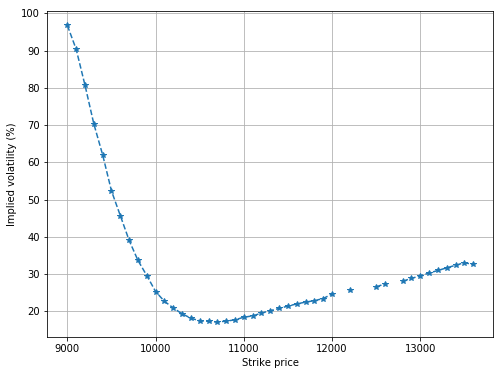

In [4]:
plt.figure(figsize = (8, 6))
plt.plot(df['履約價'], df['IV'] * 100, '*--')
plt.xlabel('Strike price')
plt.ylabel('Implied volatility (%)')
plt.grid(True)